In [ ]:
# import data

import pandas as pd

df = pd.read_csv("Tweets.csv")

df.head()




,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# data cleaning

columns_to_keep = ["tweet_id", "text", "negativereason_confidence", "airline", "retweet_count"]
df = df[columns_to_keep]



In [ ]:
df['text'] = df['text'].str.lower()
df.head()

,tweet_id,text,negativereason_confidence,airline,retweet_count
0,570306133677760513,@virginamerica what @dhepburn said.,NaN,Virgin America,0
1,570301130888122368,@virginamerica plus you've added commercials t...,0.0000,Virgin America,0
2,570301083672813571,@virginamerica i didn't today... must mean i n...,NaN,Virgin America,0
3,570301031407624196,@virginamerica it's really aggressive to blast...,0.7033,Virgin America,0
4,570300817074462722,@virginamerica and it's a really big bad thing...,1.0000,Virgin America,0


In [ ]:
df = df.dropna(subset=['negativereason_confidence'])
df.head()

,tweet_id,text,negativereason_confidence,airline,retweet_count
1,570301130888122368,@virginamerica plus you've added commercials t...,0.0000,Virgin America,0
3,570301031407624196,@virginamerica it's really aggressive to blast...,0.7033,Virgin America,0
4,570300817074462722,@virginamerica and it's a really big bad thing...,1.0000,Virgin America,0
5,570300767074181121,@virginamerica seriously would pay $30 a fligh...,0.6842,Virgin America,0
6,570300616901320704,"@virginamerica yes, nearly every time i fly vx...",0.0000,Virgin America,0


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute negative sentiment scores
df["negative_sentiment_score"] = df["text"].apply(lambda text: analyzer.polarity_scores(str(text))["neg"])

# Save the updated dataset (optional)
df.to_csv("Clean_Tweets.csv", index=False)

# Display the first few rows to check
print(df.head())

             tweet_id                                               text  \
1  570301130888122368  @virginamerica plus you've added commercials t...   
3  570301031407624196  @virginamerica it's really aggressive to blast...   
4  570300817074462722  @virginamerica and it's a really big bad thing...   
5  570300767074181121  @virginamerica seriously would pay $30 a fligh...   
6  570300616901320704  @virginamerica yes, nearly every time i fly vx...   

   negativereason_confidence         airline  retweet_count  \
1                     0.0000  Virgin America              0   
3                     0.7033  Virgin America              0   
4                     1.0000  Virgin America              0   
5                     0.6842  Virgin America              0   
6                     0.0000  Virgin America              0   

   negative_sentiment_score  
1                     0.000  
3                     0.226  
4                     0.296  
5                     0.246  
6             

In [ ]:
pip install scikit-learn nltk

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
cdf = pd.read_csv("Clean_Tweets.csv")  # Adjust path if needed

# Ensure text column is named correctly
text_column = "text"  # Change this if your column has a different name

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words="english", max_features=20)  # Adjust max_features as needed

# Transform the text data into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df[text_column].astype(str))

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF scores to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display top words with highest TF-IDF scores (optional)
print(tfidf_df.sum().sort_values(ascending=False).head(10))  # Top 10 words

# Save the results (optional)
tfidf_df.to_csv("tfidf_results.csv", index=False)

united          2119.333940
usairways       1648.230035
americanair     1580.835648
flight          1472.497442
southwestair    1039.480673
jetblue          920.770204
cancelled        500.205049
service          475.770905
just             473.788628
help             459.860640
dtype: float64


In [ ]:
# linear regression - do negative sentiment scores correlate with frequent words from TF-IDF?

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the TF-IDF results and original dataset
tfidf_df = pd.read_csv("tfidf_results.csv")  # Adjust path if needed
df = pd.read_csv("Clean_Tweets.csv")  # Adjust path if needed

# Ensure text and sentiment columns are named correctly
sentiment_column = "negative_sentiment_score"  # Ensure this exists in your dataset

# Merge the TF-IDF dataframe with the sentiment scores
df_combined = pd.concat([df[sentiment_column], tfidf_df], axis=1)

# Define features (X) and target (y)
X = df_combined.drop(columns=[sentiment_column])  # TF-IDF features
y = df_combined[sentiment_column]  # Negative sentiment scores

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Get feature importance (coefficients)
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Top 10 most predictive words:")
print(feature_importance.head(10))

# Save feature importance to a file (optional)
feature_importance.to_csv("word_correlation_scores.csv")

R² Score: 0.0480
Top 10 most predictive words:
cancelled    0.103450
delayed      0.103328
service      0.067655
customer     0.017107
flightled    0.004695
amp          0.000288
usairways   -0.000601
hours       -0.001736
flights     -0.003769
plane       -0.009133
dtype: float64


In [ ]:
pip install matplotlib seaborn wordcloud

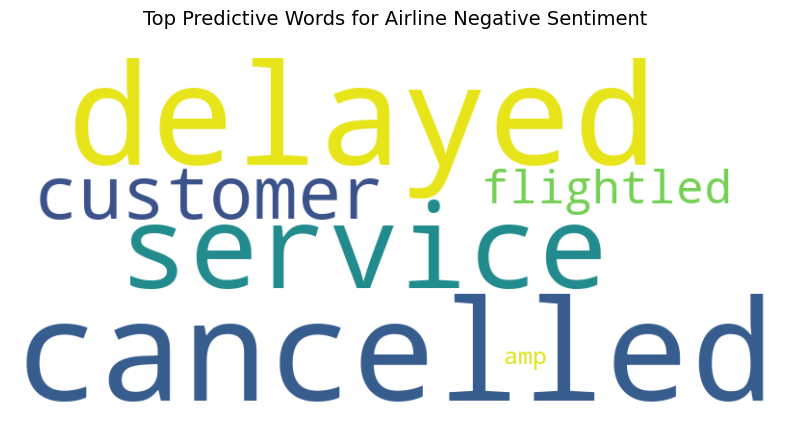

In [ ]:
# word cloud for top 10 most predictive words for negative sentiment scores

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud based on feature importance
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(feature_importance)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Top Predictive Words for Airline Negative Sentiment", fontsize=14)
plt.show()

<ipython-input-40-53bcd9795d54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_words["word"], x=top_words["vader_score"], palette="coolwarm")


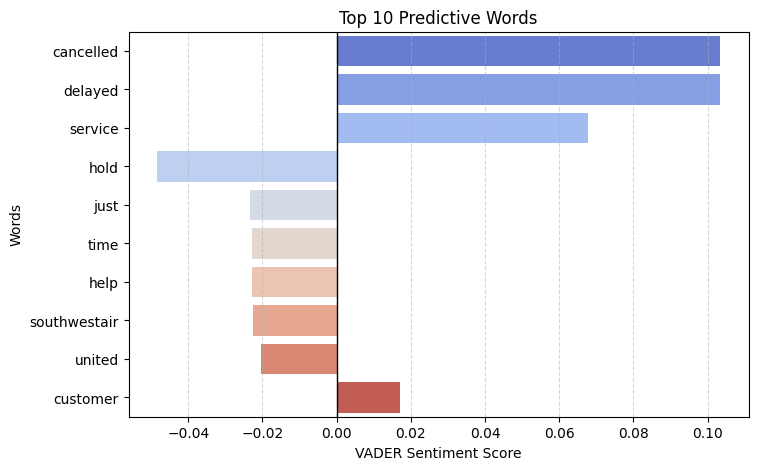

In [ ]:
# Convert feature importance dictionary to a DataFrame
word_scores = pd.DataFrame(list(feature_importance.items()), columns=["word", "vader_score"])

# Select the top 10 words with highest absolute VADER scores (strongest predictors)
top_words = word_scores.reindex(word_scores["vader_score"].abs().nlargest(10).index)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y=top_words["word"], x=top_words["vader_score"], palette="coolwarm")

# Labels and title
plt.xlabel("VADER Sentiment Score")
plt.ylabel("Words")
plt.title("Top 10 Predictive Words")
plt.axvline(0, color='black', linewidth=1)  # Adds a vertical line at neutral (0)
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

In [ ]:
# is there a difference between predicted sentiment scores included in the dataset and VADER?



In [ ]:
pip install statsmodels

In [ ]:
import statsmodels.api as sm

# Define X (predictor) and y (outcome)
X = cdf[['negativereason_confidence']]  # Independent variable
y = cdf['negative_sentiment_score']  # Dependent variable

# Add a constant term for intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary (includes p-values and confidence intervals)
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_score   R-squared:                       0.052
Model:                                  OLS   Adj. R-squared:                  0.052
Method:                       Least Squares   F-statistic:                     574.6
Date:                      Sun, 16 Feb 2025   Prob (F-statistic):          1.10e-123
Time:                              23:11:52   Log-Likelihood:                 8453.1
No. Observations:                     10522   AIC:                        -1.690e+04
Df Residuals:                         10520   BIC:                        -1.689e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:
# correlation between word frequency and word importance

from scipy.stats import pearsonr

# Compute correlation between word frequency (TF-IDF sum) and word importance (regression coefficients)
correlation, p_value = pearsonr(tfidf_df.sum(), feature_importance)

# Print correlation results
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation: -0.0546
P-value: 0.8191


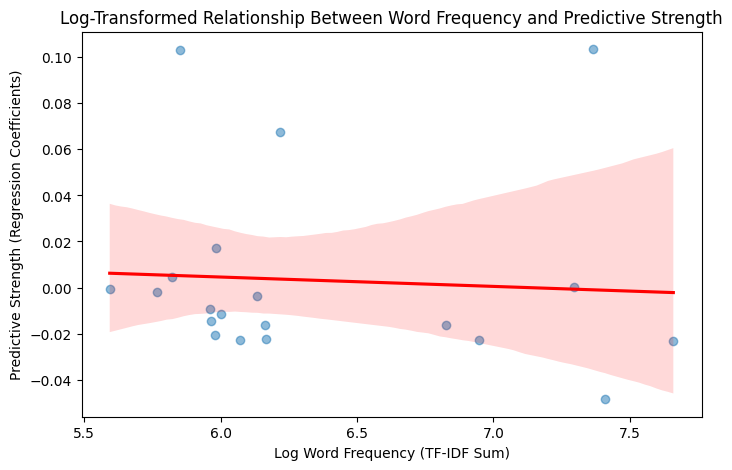

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Apply log transformation (adding 1 to avoid log(0))
sns.regplot(x=np.log1p(tfidf_df.sum()), y=feature_importance, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.xlabel("Log Word Frequency (TF-IDF Sum)")
plt.ylabel("Predictive Strength (Regression Coefficients)")
plt.title("Log-Transformed Relationship Between Word Frequency and Predictive Strength")
plt.show()

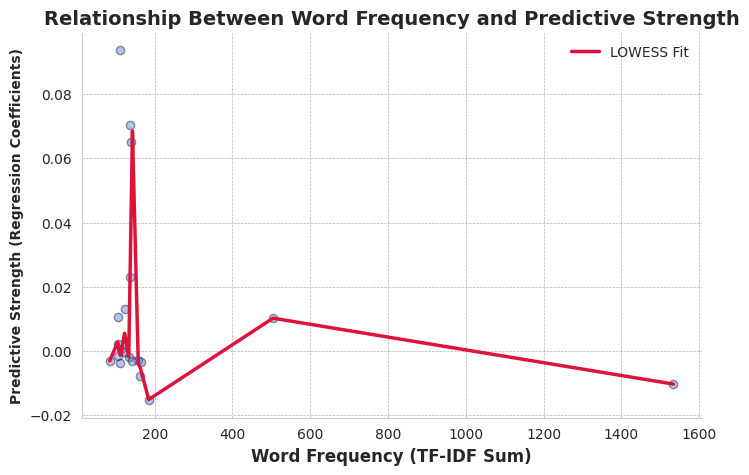

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))

# Apply LOWESS smoothing
lowess = sm.nonparametric.lowess(feature_importance, tfidf_df.sum(), frac=0.3)

# Plot scatter points with transparency
plt.scatter(tfidf_df.sum(), feature_importance, alpha=0.4, color="royalblue", edgecolors="k")

# Plot LOWESS smoothed line
plt.plot(lowess[:, 0], lowess[:, 1], color="crimson", linewidth=2.5, label="LOWESS Fit")

# Labels and title
plt.xlabel("Word Frequency (TF-IDF Sum)", fontsize=12, fontweight="bold")
plt.ylabel("Predictive Strength (Regression Coefficients)", fontsize=10, fontweight="bold")
plt.title("Relationship Between Word Frequency and Predictive Strength", fontsize=14, fontweight="bold")

# Add subtle gridlines
plt.grid(color="gray", linestyle="dashed", linewidth=0.5, alpha=0.6)

# Remove top and right spines for a cleaner look
sns.despine()

# Add legend
plt.legend(frameon=False, fontsize=10)

# Show plot
plt.show()

In [ ]:
keywords = ["late", "cancelled", "long lines"]

# Create a column to check if the tweet contains the keywords
for word in keywords:
    cdf[word] = cdf["text"].str.contains(word, case=False, na=False).astype(int)

# Check how often each keyword appears
keyword_counts = cdf[keywords].sum()
print(keyword_counts)


late          411
cancelled     952
long lines      2
dtype: int64


In [ ]:
keyword_sentiment = cdf.groupby(keywords)["negativereason_confidence"].mean()
print(keyword_sentiment)

late  cancelled  long lines
0     0          0             0.623728
                 1             0.655450
      1          0             0.751166
1     0          0             0.706737
      1          0             0.774941
Name: negativereason_confidence, dtype: float64


In [ ]:
from scipy.stats import spearmanr

for word in keywords:
    correlation, p_value = spearmanr(cdf[word], cdf["negativereason_confidence"])
    print(f"Correlation between '{word}' and negative sentiment score: {correlation:.3f}, p-value: {p_value:.3f}")

Correlation between 'late' and negative sentiment score: 0.044, p-value: 0.000
Correlation between 'cancelled' and negative sentiment score: 0.105, p-value: 0.000
Correlation between 'long lines' and negative sentiment score: -0.004, p-value: 0.670


<ipython-input-35-91ec7a7d7736>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Cancelled"], y=[cancelled_corr], palette="Reds")


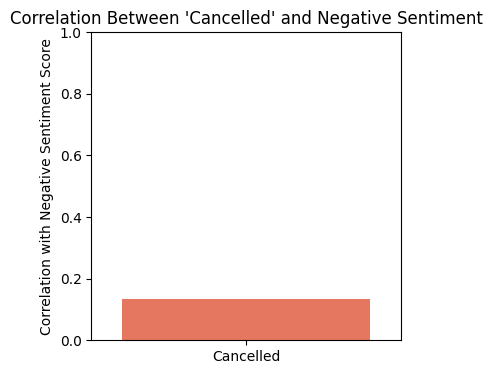

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation for "cancelled"
cancelled_corr = cdf["cancelled"].corr(cdf["negative_sentiment_score"])

# Plot as a bar chart
plt.figure(figsize=(4, 4))
sns.barplot(x=["Cancelled"], y=[cancelled_corr], palette="Reds")
plt.ylabel("Correlation with Negative Sentiment Score")
plt.title("Correlation Between 'Cancelled' and Negative Sentiment")
plt.ylim(0, 1)

plt.show()

<ipython-input-42-a1afb61fb96e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=airline_sentiment["airline"], x=airline_sentiment["vader_score"], palette="coolwarm")


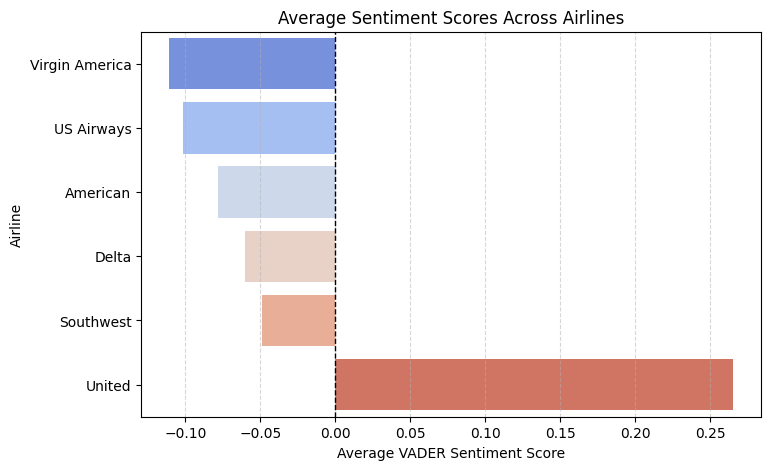

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to get sentiment scores for each tweet
df["vader_score"] = df["text"].apply(lambda tweet: analyzer.polarity_scores(tweet)["compound"])

# Compute average sentiment score per airline
airline_sentiment = df.groupby("airline")["vader_score"].mean().reset_index()

# Sort airlines by sentiment for better visualization
airline_sentiment = airline_sentiment.sort_values(by="vader_score", ascending=True)

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(y=airline_sentiment["airline"], x=airline_sentiment["vader_score"], palette="coolwarm")

# Labels and title
plt.xlabel("Average VADER Sentiment Score")
plt.ylabel("Airline")
plt.title("Average Sentiment Scores Across Airlines")
plt.axvline(0, color='black', linewidth=1, linestyle="--")  # Neutral sentiment reference line
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

## References  

[1] B. Hamner, “Exploring airline Twitter sentiment data,” *Kaggle*,  
&nbsp;&nbsp;&nbsp;&nbsp;[https://www.kaggle.com/code/benhamner/exploring-airline-twitter-sentiment-data/input](https://www.kaggle.com/code/benhamner/exploring-airline-twitter-sentiment-data/input) (accessed Jan. 29, 2025).  

[2] C. J. Hutto and E. E. Gilbert, "VADER: A parsimonious rule-based model for sentiment analysis of social media text,"  
&nbsp;&nbsp;&nbsp;&nbsp;*Proceedings of the Eighth International Conference on Weblogs and Social Media (ICWSM-14)*,  
&nbsp;&nbsp;&nbsp;&nbsp;Ann Arbor, MI, USA, June 2014.  

[3] C. Sammut and G. I. Webb, "TF–IDF," in *Encyclopedia of Machine Learning*, Springer, Boston, MA, 2011.  
&nbsp;&nbsp;&nbsp;&nbsp;doi: [10.1007/978-0-387-30164-8_832](https://doi.org/10.1007/978-0-387-30164-8_832).  

[4] “Air traffic by the numbers,” *Federal Aviation Administration*,  
&nbsp;&nbsp;&nbsp;&nbsp;[https://www.faa.gov/air_traffic/by_the_numbers](https://www.faa.gov/air_traffic/by_the_numbers) (accessed Jan. 29, 2025).  

